In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-attrition-insights/Bank-Customer-Attrition-Insights-Data.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data=pd.read_csv('/kaggle/input/bank-customer-attrition-insights/Bank-Customer-Attrition-Insights-Data.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [7]:
data.shape

(10000, 18)

In [8]:
# Dropping Irrelevant Columns
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [9]:
data.shape

(10000, 15)

In [10]:
data.info()    #No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [11]:
data.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [12]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [13]:
# separating categorical and numerical columns
numerical=[]
categorical=[]
for i in data.columns:
    if(data[i].dtype==object):
        categorical.append(i)
    else:
        numerical.append(i)
        

In [14]:
print(categorical)
print(numerical)

['Geography', 'Gender', 'Card Type']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']


**Exploratory Data Analysis**

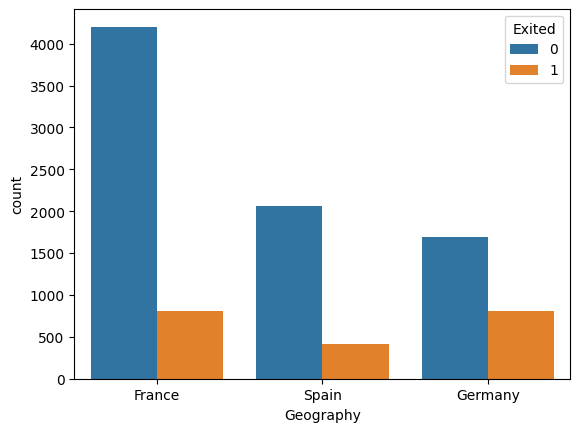

In [15]:
sns.countplot(data=data,x="Geography",hue="Exited")
plt.show()                                        

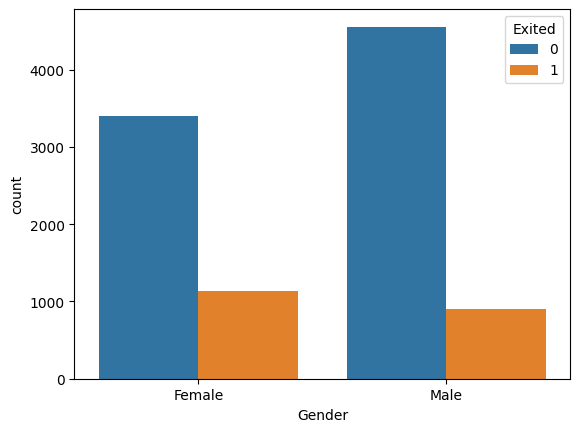

In [16]:
sns.countplot(data=data,x="Gender",hue="Exited")
plt.show()                                        

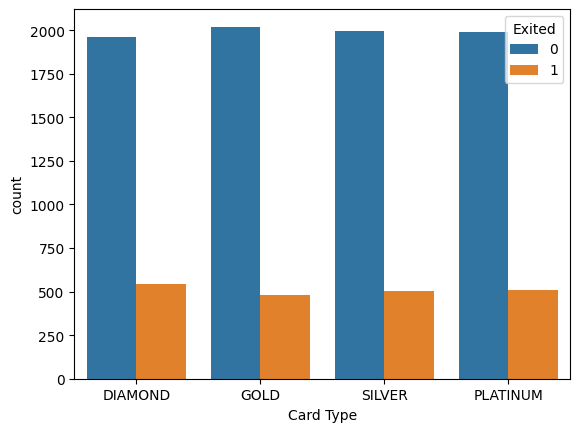

In [17]:
sns.countplot(data=data,x="Card Type",hue="Exited")
plt.show()                                        

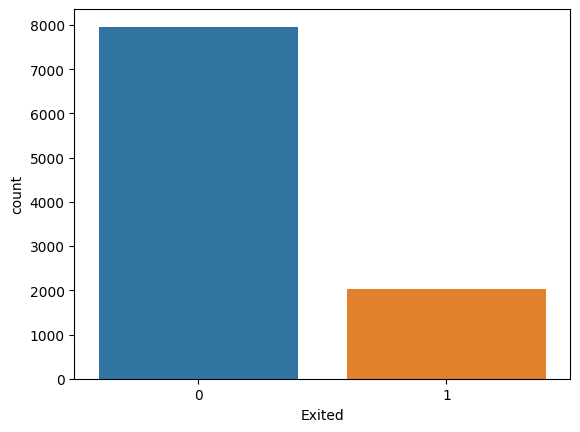

In [18]:
sns.countplot(data=data,x="Exited")
plt.show()   #Less have exited

In [19]:
data['Exited'].value_counts()    #Clear Class Imbalance

Exited
0    7962
1    2038
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

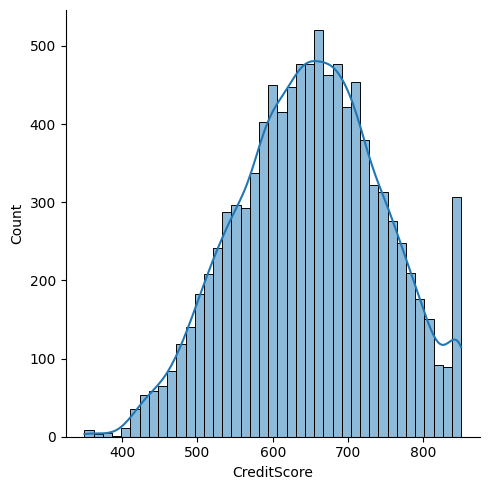

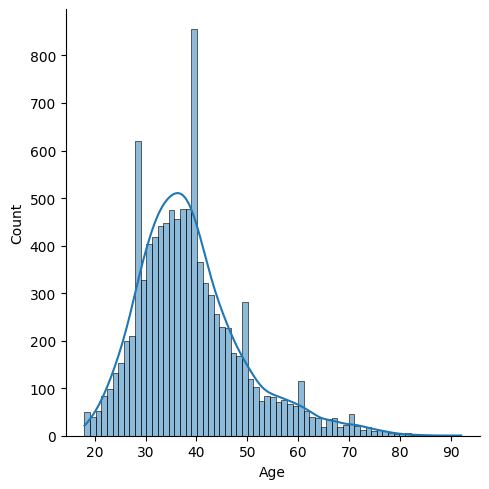

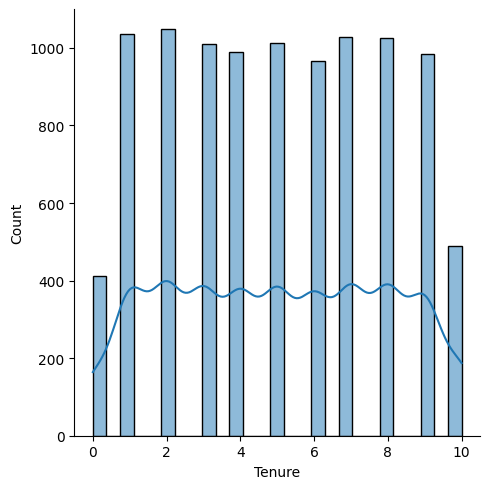

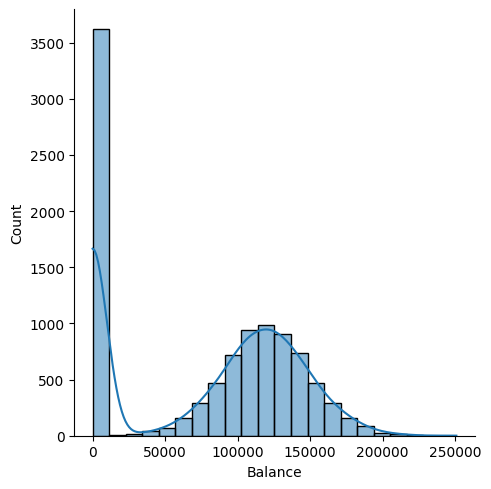

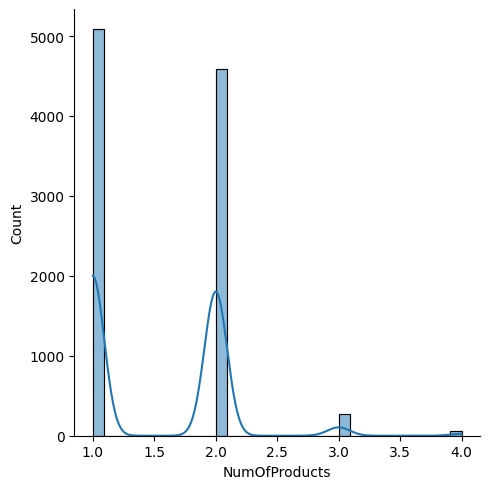

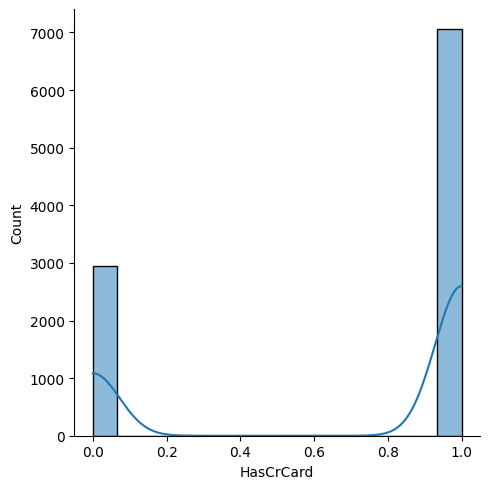

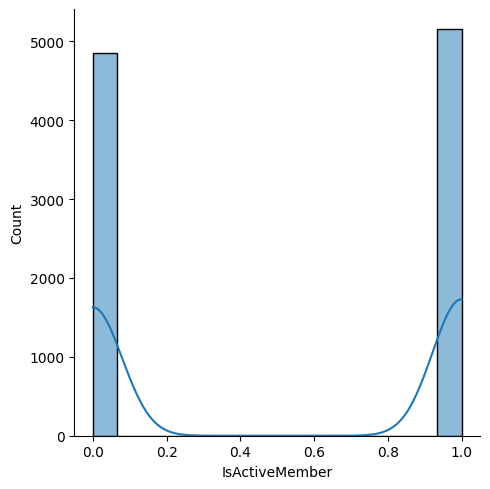

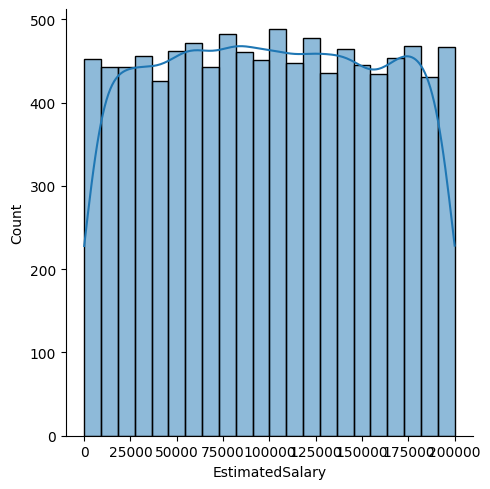

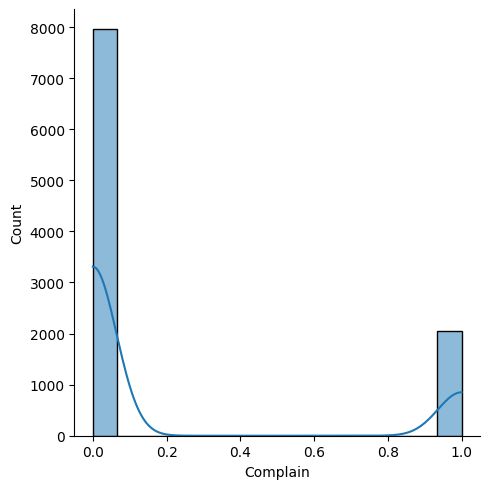

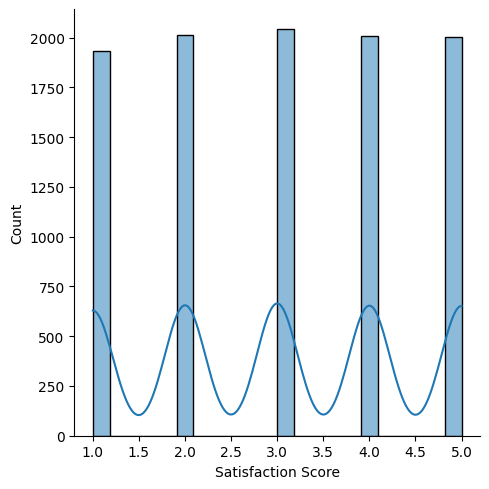

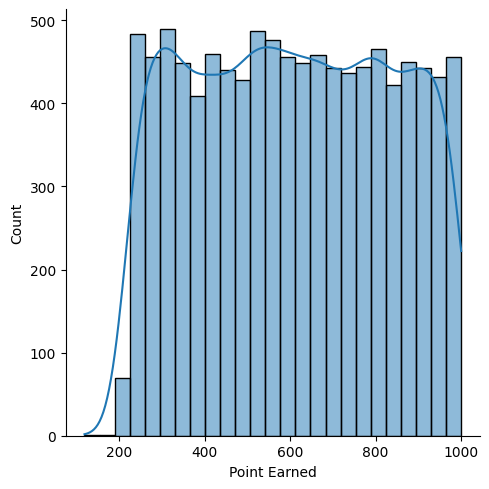

In [20]:
for i in numerical:
    if(i!='Exited'):
        sns.displot(data=data,x=i,kde=True)
        

**Do customers with shorter/longer tenure churn more?**

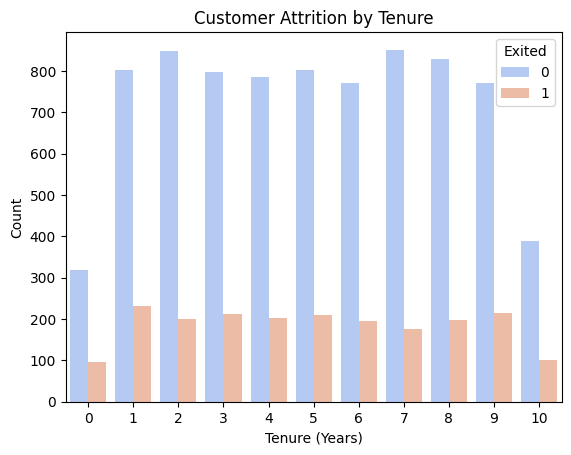

In [21]:
sns.countplot(x='Tenure', hue='Exited', data=data, palette='coolwarm')
plt.title('Customer Attrition by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.show()

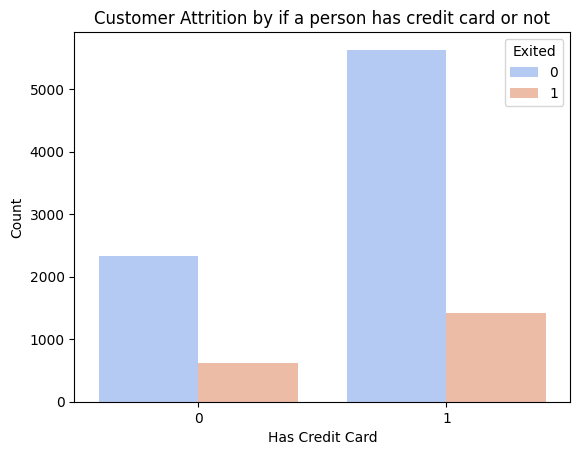

In [22]:
sns.countplot(x='HasCrCard', hue='Exited', data=data, palette='coolwarm')
plt.title('Customer Attrition by if a person has credit card or not')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()

**Statistical Analysis**

In [23]:
from scipy.stats import ttest_ind

tenure_exited = data[data['Exited'] == 1]['Tenure']
tenure_retained = data[data['Exited'] == 0]['Tenure']

t_stat, p_value = ttest_ind(tenure_exited, tenure_retained, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in tenure between churned and retained customers.")
else:
    print("No significant difference in tenure between churned and retained customers.")

T-Statistic: -1.3500084977201092, P-Value: 0.17711132973115434
No significant difference in tenure between churned and retained customers.


In [24]:
from scipy.stats import ttest_ind

# Balance
balance_exited = data[data['Exited'] == 1]['Balance']
balance_retained = data[data['Exited'] == 0]['Balance']
t_stat_bal, p_val_bal = ttest_ind(balance_exited, balance_retained, equal_var=False)

print(f"T-Test for Balance: t-stat={t_stat_bal}, p-value={p_val_bal}")
if p_val_bal < 0.05:
    print("Balance has a significant impact on customer attrition.")
else:
    print("Balance does not significantly impact customer attrition.")



T-Test for Balance: t-stat=12.47802583232175, p-value=5.817634004614696e-35
Balance has a significant impact on customer attrition.


In [25]:
#Salary
salary_exited = data[data['Exited'] == 1]['EstimatedSalary']
salary_retained = data[data['Exited'] == 0]['EstimatedSalary']
t_stat_sal, p_val_sal = ttest_ind(salary_exited, salary_retained, equal_var=False)

print(f"T-Test for Salary: t-stat={t_stat_sal}, p-value={p_val_sal}")
if p_val_sal < 0.05:
    print("Salary has a significant impact on customer attrition.")
else:
    print("Salary does not significantly impact customer attrition.")

T-Test for Salary: t-stat=1.2421282993656562, p-value=0.21428203203157278
Salary does not significantly impact customer attrition.


In [26]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(data['NumOfProducts'], data['Exited'])

# Perform Chi-Square Test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test for NumOfProducts: Chi2={chi2}, p-value={p_value}")

if p_value < 0.05:
    print("Number of products significantly impacts customer attrition.")
else:
    print("Number of products does not significantly impact customer attrition.")

Chi-Square Test for NumOfProducts: Chi2=1501.5048306588592, p-value=0.0
Number of products significantly impacts customer attrition.


**Feature Engineering**

In [27]:
# Define age bins and labels
bins = [18, 30, 50, 100]  # Age Ranges
labels = ['Young', 'Middle-aged', 'Senior']

# Create Age Group Column
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


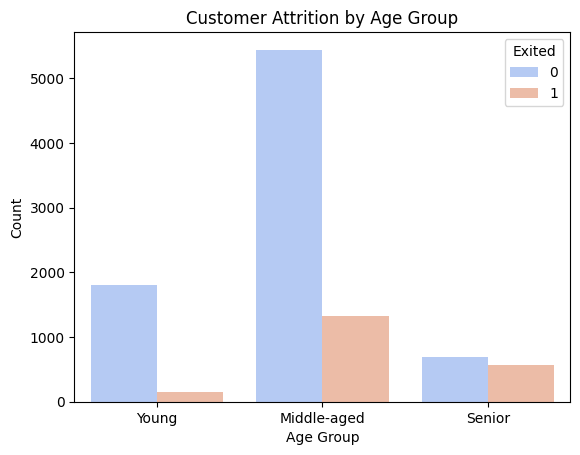

In [28]:
sns.countplot(x='AgeGroup', hue='Exited', data=data, palette='coolwarm')
plt.title('Customer Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


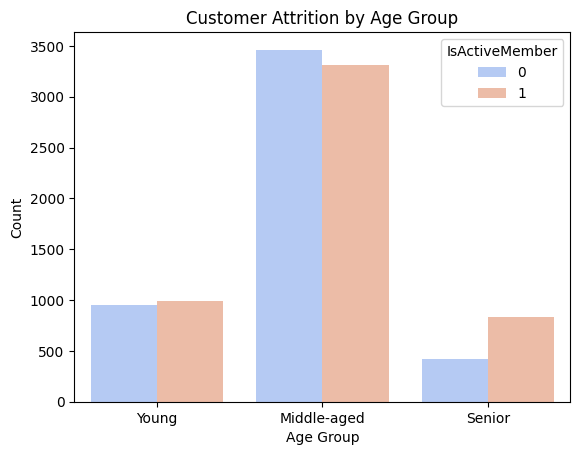

In [29]:
sns.countplot(x='AgeGroup', hue='IsActiveMember', data=data, palette='coolwarm')
plt.title('Customer Attrition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

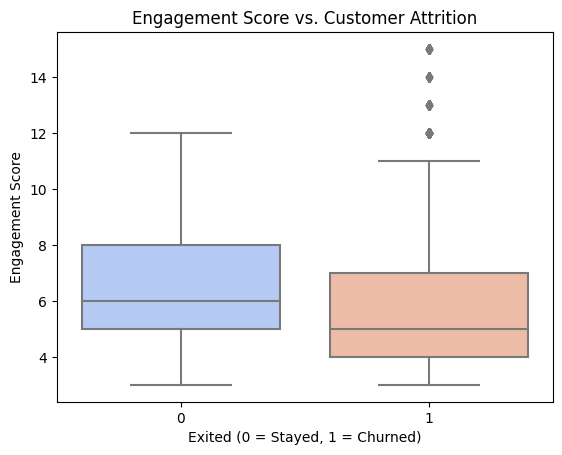

In [30]:
# Create Customer Engagement Score
data['EngagementScore'] = (data['IsActiveMember'] * 2) + (data['NumOfProducts'] * 3) + (data['HasCrCard'] * 1)

# Plot Engagement Score Distribution
sns.boxplot(x='Exited', y='EngagementScore', data=data, palette='coolwarm')
plt.title('Engagement Score vs. Customer Attrition')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Engagement Score')
plt.show()

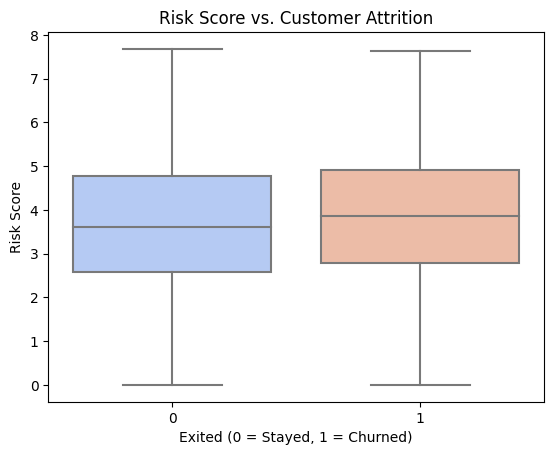

In [31]:
data['Balance_Norm'] = data['Balance'] / data['Balance'].max()
data['Tenure_Norm'] = data['Tenure'] / data['Tenure'].max()
data['Satisfaction_Norm'] = data['Satisfaction Score'] / data['Satisfaction Score'].max()
data['RiskScore'] = (data['Balance_Norm'] * 2) + ((1 - data['Tenure_Norm']) * 3) + ((1 - data['Satisfaction_Norm']) * 4)

sns.boxplot(x='Exited', y='RiskScore', data=data, palette='coolwarm')
plt.title('Risk Score vs. Customer Attrition')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Risk Score')
plt.show()
#Risk Score alone may not be the best indicator of customer churn.

In [32]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'AgeGroup', 'EngagementScore', 'Balance_Norm', 'Tenure_Norm',
       'Satisfaction_Norm', 'RiskScore'],
      dtype='object')

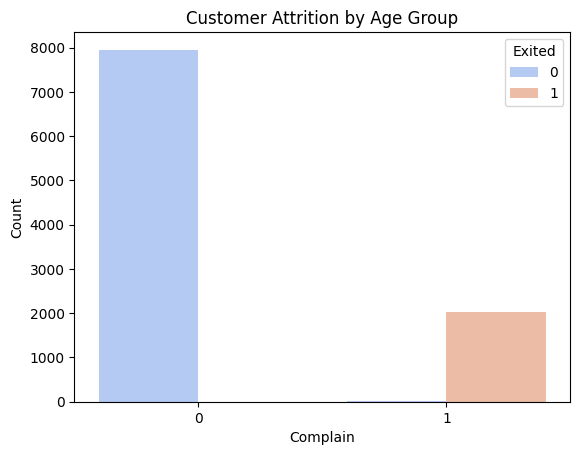

In [33]:
sns.countplot(x='Complain', hue='Exited', data=data, palette='coolwarm')
plt.title('Customer Attrition by Age Group')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.show()

In [34]:
complain_exited = data[data['Complain'] == 1]['EstimatedSalary']
complain_retained = data[data['Complain'] == 0]['EstimatedSalary']
t_stat_sal, p_val_sal = ttest_ind(complain_exited, complain_retained, equal_var=False)

print(f"T-Test for Salary: t-stat={t_stat_sal}, p-value={p_val_sal}")
if p_val_sal < 0.05:
    print("Complain has a significant impact on customer attrition.")
else:
    print("Complain does not significantly impact customer attrition.")

T-Test for Salary: t-stat=1.2434075304659473, p-value=0.21381009129162476
Complain does not significantly impact customer attrition.


In [35]:
categorical.append('AgeGroup')

**Model Building**

In [36]:
# Encoding Categorical Variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical or i=='AgeGroup':
    data[i]=le.fit_transform(data[i])

In [37]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,EngagementScore,Balance_Norm,Tenure_Norm,Satisfaction_Norm,RiskScore
0,619,0,0,42,2,0.00,1,1,1,101348.88,...,1,2,0,464,0,6,0.000000,0.2,0.4,4.800000
1,608,2,0,41,1,83807.86,1,0,1,112542.58,...,1,3,0,456,0,5,0.334031,0.1,0.6,4.968063
2,502,0,0,42,8,159660.80,3,1,0,113931.57,...,1,3,0,377,0,10,0.636357,0.8,0.6,3.472714
3,699,0,0,39,1,0.00,2,0,0,93826.63,...,0,5,1,350,0,6,0.000000,0.1,1.0,2.700000
4,850,2,0,43,2,125510.82,1,1,1,79084.10,...,0,5,1,425,0,6,0.500246,0.2,1.0,3.400492


In [38]:
data.drop(['Balance_Norm','Tenure_Norm','Satisfaction_Norm','RiskScore','Age'],inplace=True,axis=1)

In [39]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
sc = StandardScaler()
num_cols_1 = ['CreditScore', 'Balance']
num_cols_2=['EstimatedSalary', 'Point Earned']
for col in num_cols_1:
    data[col] = sc.fit_transform(data[[col]]) 
for col in num_cols_2:
    data[col]=m.fit_transform(data[[col]])
    

    

    

In [40]:
data.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,EngagementScore
0,-0.326221,0,0,2,-1.225848,1,1,1,0.506735,1,1,2,0,0.391600,0,6
1,-0.440036,2,0,1,0.117350,1,0,1,0.562709,0,1,3,0,0.382520,0,5
2,-1.536794,0,0,8,1.333053,3,1,0,0.569654,1,1,3,0,0.292849,0,10
3,0.501521,0,0,1,-1.225848,2,0,0,0.469120,0,0,5,1,0.262202,0,6
4,2.063884,2,0,2,0.785728,1,1,1,0.395400,0,0,5,1,0.347333,0,6


In [41]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
X = data.drop(columns=['Exited'])  # Features
y = data['Exited']  # Target

# Compute Mutual Information for classification
mi_scores = mutual_info_classif(X, y, random_state=42)

# Convert to DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by="MI Score", ascending=False)
print(mi_df.head(11))

               Feature  MI Score
9             Complain  0.495736
14     EngagementScore  0.073465
5        NumOfProducts  0.070475
13            AgeGroup  0.038387
7       IsActiveMember  0.015480
1            Geography  0.009999
4              Balance  0.008967
2               Gender  0.006478
6            HasCrCard  0.005457
10  Satisfaction Score  0.004344
12        Point Earned  0.002987


**Recursive Feature Elimination**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #To check linearly separabale

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict and check accuracy
y_pred_lda = lda.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))


LDA Accuracy: 0.999


**SMOTE FOR CLASS IMBALANCE**

In [44]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Check class distribution before applying SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' balances classes
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after applying SMOTE
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 6355, 1: 1645})
After SMOTE: Counter({0: 6355, 1: 6355})


In [45]:
# Initialize Logistic Regression Model
log_reg = LogisticRegression(max_iter=10000)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(log_reg, n_features_to_select=7)  # Select top 7 features
X_train_selected = rfe.fit_transform(X_train_smote, y_train_smote)
X_test_selected = rfe.transform(X_test)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Gender', 'Balance', 'IsActiveMember', 'Complain', 'Satisfaction Score',
       'Point Earned', 'AgeGroup'],
      dtype='object')


In [46]:
log_reg.fit(X_train_selected, y_train_smote)
y_pred = log_reg.predict(X_train_selected)
print("Training Accuracy:", accuracy_score(y_train_smote, y_pred))
print(classification_report(y_train_smote, y_pred))               #Training Accuracy

Training Accuracy: 0.9985837922895358
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6355
           1       1.00      1.00      1.00      6355

    accuracy                           1.00     12710
   macro avg       1.00      1.00      1.00     12710
weighted avg       1.00      1.00      1.00     12710



In [47]:
y_pred = log_reg.predict(X_test_selected)
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))   

Testing Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



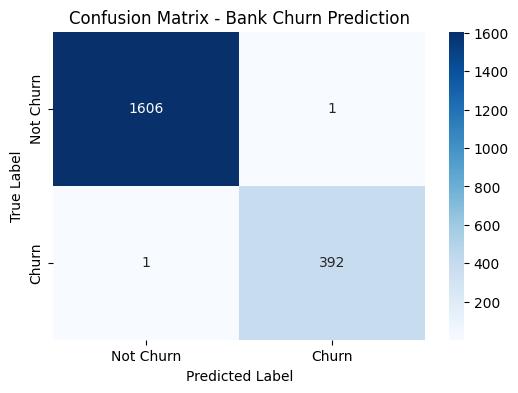

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bank Churn Prediction")
plt.show()

**Model Building using Features given by Mutual Information**

In [49]:
data_mi = data[['Complain', 'EngagementScore', 'NumOfProducts', 
                'AgeGroup', 'IsActiveMember', 'Geography', 
                'Gender', 'Tenure', 'Point Earned','Balance','Exited']]
X = data.drop(columns=['Exited']) 
y = data['Exited'] 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE
from collections import Counter
print("Before SMOTE:", Counter(y_train))

smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print("After SMOTE:", Counter(y_train_smote))
log_reg_2=LogisticRegression(max_iter=10000)
log_reg_2.fit(X_train_smote, y_train_smote)
y_pred = log_reg_2.predict(X_train_smote)
print("Training Accuracy:", accuracy_score(y_train_smote, y_pred))
print(classification_report(y_train_smote, y_pred))               #Training Accuracy

Before SMOTE: Counter({0: 6355, 1: 1645})
After SMOTE: Counter({0: 6355, 1: 6355})
Training Accuracy: 0.9985837922895358
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6355
           1       1.00      1.00      1.00      6355

    accuracy                           1.00     12710
   macro avg       1.00      1.00      1.00     12710
weighted avg       1.00      1.00      1.00     12710



In [51]:
y_pred = log_reg_2.predict(X_test)
print("Training Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))        

Training Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



**Overlapping Features**

In [52]:
top_mi_features = mi_df['Feature'].head(7).tolist()
selected_rfe_features = selected_features.tolist()
overlapping_features = list(set(top_mi_features) & set(selected_rfe_features))
print("Overlapping Features:", overlapping_features)


Overlapping Features: ['IsActiveMember', 'AgeGroup', 'Balance', 'Complain']


In [53]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

In [54]:
prediction=log_reg.predict([[0,1,1,101348.88,1,464,1]])

In [55]:
print([prediction])

[array([1])]
